# Data Wrangling Project
- Submitted By Ankit Kumar
- 25.May.2020


### Summary

The dataset that I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.


#### Data Wrangling includes :

- **Gathering** :
    Gathering includes acquiring of the data from different or sometimes the same source.
    
- **Assessing** :
    Assessing  the datasets for quality issues and tidyness issues.
    
- **Cleaning**  :
    Cleaning the datasets for determined issues
    
- **Analyzing** :
    Analyzing the datasets for quick insights

### Project Workflow:
   
   **1) Gathering**
       
      a)Importing dataset from the downloaded file. 
      b)Downloading and writing to the file programmatically.
      c)Querying the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire
        set of JSON data in a file called tweet_json.txt file.
   **2) Assessing**
   
   **3) Cleaning**
   
   **4) Analyzing**

In [2]:
#importing necessary libraries and modules
import pandas as pd
import numpy as np
import requests
import json
import tweepy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [4]:
#changing the working directory
cd "F:\udacity_off\WeRateDogs"

F:\udacity_off\WeRateDogs


## 1) Gathering

**a) Importing dataset from the downloaded file.**

In [5]:
# load WeRateDogs twitter archive data from .csv
twitterarchive=pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
twitterarchive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


**b) Downloading and writing to the file programmatically.**

In [11]:
# Get tweet image predictions from URL
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)

In [17]:
# opening and writing to the file
with open('image-predictions.tsv','wb') as file:
    file.write(response.content)

In [5]:
#loading dataset from the file
image_pred=pd.read_csv('image-predictions.tsv',sep='\t')

In [34]:
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**c) Querying the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file.**

In [21]:
# Setup Twitter API access keys and tokens
consumer_key = 'p7XebYyxUmg8fl1TGsOgw5kk0'
consumer_secret = 'dphyT2smK4b5j4K8dft38D6Sny3v07J05jXfEknsX0xVJrgqFJ'
access_token = '251522847-GciqWjnHrZrRfgBPVbq04D6wtSiSC7Eke0y3rVn6'
access_secret = 'G3INLL944qIUorAuQNJuqyS3O4z7HGSl0GubKS0YCZVh0'

In [25]:
# Create Twitter API object
auth=tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)
api=tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [37]:
# Get json data from twitter API and write to file
df_list=[]
e_list=[]
with open('tweet_json.txt','a',encoding='utf-8') as jsonfile:
    for tweetid in twitterarchive.tweet_id:
        try:
            page=api.get_status(tweetid,extended=True)
            json.dump(page._json,jsonfile)
            jsonfile.write('\n')
        except:
            e_list.append(tweetid)

Rate limit reached. Sleeping for: 115


In [123]:
# Make list of dictionaries for conversion to Dataframe
df_list=[] # empty list to append to
with open('tweet_json.txt','r',encoding='utf-8') as jsonfile:
    for tweet in jsonfile:
        json_dict=json.loads(tweet)
        tweet_id=json_dict['id']
        retweet_count = json_dict['retweet_count']
        favorite_count = json_dict['favorite_count']
        hashtags=json_dict['entities']['hashtags']
        
        if len(hashtags)==0:# if no hashtag, set to NaN
            df_list.append({'tweet_id':int(tweet_id),
                            'retweet_count':int(retweet_count),
                            'favorite_count':int(favorite_count),
                            'hashtags':np.nan})
        else: # if hashtag is present, append as normal
            df_list.append({'tweet_id':int(tweet_id),
                            'retweet_count':int(retweet_count),
                            'favorite_count':int(favorite_count),
                            'hashtags':hashtags[0]['text']})

In [128]:
# convert list of dictionaries to DataFrame.
df_tweets=pd.DataFrame(df_list,columns=['tweet_id','retweet_count','favorite_count','hashtags'])

## 2) Assessing

In [36]:
twitterarchive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [37]:
#get summary of twitter_archive
twitterarchive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [51]:
#random sample of 40 entries in the twitterarchive
twitterarchive.sample(40)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
937,753298634498793472,NaN,NaN,2016-07-13 18:42:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Carly. She's actually 2...,6.815232e+17,4.196984e+09,2015-12-28 17:12:42 +0000,https://twitter.com/dog_rates/status/681523177...,12,10,Carly,None,None,None,None
293,837820167694528512,NaN,NaN,2017-03-04 00:21:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Here's a pupper before and after being asked ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/837820167...,12,10,None,None,None,pupper,None
1743,679405845277462528,NaN,NaN,2015-12-22 20:59:10 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Crazy unseen footage from Jurassic Park. 10/10...,NaN,NaN,NaN,https://vine.co/v/iKVFEigMLxP,10,10,None,None,None,None,None
2024,671891728106971137,NaN,NaN,2015-12-02 03:20:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mojo. Apparently he's too cute for a s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671891728...,11,10,Mojo,None,None,None,None
323,834089966724603904,NaN,NaN,2017-02-21 17:18:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",DOGGO ON THE LOOSE I REPEAT DOGGO ON THE LOOSE...,NaN,NaN,NaN,https://twitter.com/stevekopack/status/8340866...,10,10,None,doggo,None,None,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
1261,710153181850935296,NaN,NaN,2016-03-16 17:18:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lacy. She's tipping her hat to you. Da...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710153181...,11,10,Lacy,None,None,None,None
1772,678278586130948096,NaN,NaN,2015-12-19 18:19:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Another spooky pupper here. Most definitely fl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678278586...,10,10,None,None,None,pupper,None
872,761371037149827077,NaN,NaN,2016-08-05 01:19:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Oh. My. God. 13/10 magical af h...,7.116948e+17,4.196984e+09,2016-03-20 23:23:54 +0000,https://twitter.com/dog_rates/status/711694788...,13,10,None,None,None,None,None


In [38]:
#checking for duplicated entries in the dataset
twitterarchive.tweet_id.duplicated().sum()

0

In [39]:
#summary for df_tweets
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
tweet_id          2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
hashtags          19 non-null object
dtypes: int64(3), object(1)
memory usage: 72.9+ KB


### Quality issues

**twitterarchive**

- Removing Null tweets and retweets

- Some entries in the 'name'  are incorrect - 'an' ,'a', 'the' ,'very' ,etc.

- Converting 'timestamp' to datetime format

- 'tweetid' of type float instead of string

**imagepredictions**

- tweet_id need to be string

**df_tweets**

- tweet_id not string

### Tidyness

**twitter_archive**

    doggo, floofer, pupper, puppo columns should be one column named "dog_type"

**image_predictions**

    None

**df_tweets**

    None

**General Tidyness**

    twitter_archive, image_predictions, df_tweets should be joined as one table


## 3) Cleaning

In [40]:
#creating copies of each dataframe
twitterarchiveC=twitterarchive.copy()
image_predC=image_pred.copy()
df_tweetsC=df_tweets.copy()

In [41]:
# Assessing visually
twitterarchiveC.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [44]:
# Assessing visually
twitterarchiveC

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [45]:
#summary of the data set
twitterarchiveC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### i) Correcting names

In [46]:
#defining function to correct the names in the 'name' colummn
def nameclean(name):
    if name[0].islower():
        return 'None'
    else:
        return name

In [47]:
#applying the function to the column
twitterarchiveC.name=twitterarchiveC.name.apply(nameclean)

#### ii) Removing the replies and retweets

In [51]:
twitterarchiveCd=twitterarchiveC

In [52]:
# removing the in_reply_to_status_id column , for removing the replies and retweets  
twitterarchiveCd=twitterarchiveCd[twitterarchiveCd.in_reply_to_status_id.isna()]

In [55]:
twitterarchiveCd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

In [54]:
twitterarchiveCd=twitterarchiveCd[twitterarchiveCd.retweeted_status_id.isna()]

In [122]:
list(twitterarchiveCd)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [57]:
#dropping the unnecessary null columns
twitterarchiveCd.drop([ 'in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True)

In [62]:
#storing back to the original dataframe
twitterarchiveC=twitterarchiveCd

#### iii) Changing the datatype of tweet_id column to string

In [63]:
twitterarchiveC.tweet_id=twitterarchiveC.tweet_id.astype(str)

#### iv) Changing the datatype of timestamp column to datetime

In [64]:
twitterarchiveC.timestamp=pd.to_datetime(twitterarchiveC.timestamp)

#### v) Removing the null entries in the expanded_urls

In [65]:
twitterarchiveC=twitterarchiveC[~(twitterarchiveC.expanded_urls.isna())]

In [66]:
twitterarchiveC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2094 non-null object
timestamp             2094 non-null datetime64[ns, UTC]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(9)
memory usage: 212.7+ KB


In [217]:
#converging multiple columns in one
a=pd.melt(twitterarchiveC,id_vars=['tweet_id','timestamp','source','text','expanded_urls','rating_numerator','rating_denominator','name'],value_vars=['doggo',
 'floofer',
 'pupper',
 'puppo'],var_name = 'types', value_name = 'dog_type')

In [68]:
a.shape

(8376, 10)

In [72]:
a[a.tweet_id=='686683045143953408']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,types,dog_type
1355,686683045143953408,2016-01-11 22:56:10+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Mona. She's a Yarborough Splishnsplash...,https://twitter.com/dog_rates/status/686683045...,11,10,Mona,doggo,None
3449,686683045143953408,2016-01-11 22:56:10+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Mona. She's a Yarborough Splishnsplash...,https://twitter.com/dog_rates/status/686683045...,11,10,Mona,floofer,None
5543,686683045143953408,2016-01-11 22:56:10+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Mona. She's a Yarborough Splishnsplash...,https://twitter.com/dog_rates/status/686683045...,11,10,Mona,pupper,pupper
7637,686683045143953408,2016-01-11 22:56:10+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Mona. She's a Yarborough Splishnsplash...,https://twitter.com/dog_rates/status/686683045...,11,10,Mona,puppo,None


> We can see that for each tweet_id there entries for each dog_type

In [218]:
a.dog_type.value_counts()

None       8030
pupper      229
doggo        83
puppo        24
floofer      10
Name: dog_type, dtype: int64

In [219]:
#Removing the 'NONE' values in the dog_type columns with duplicated tweet_id
q=a.sort_values('dog_type').drop_duplicates('tweet_id',keep='last')

In [220]:
q.dog_type.value_counts()

None       1759
pupper      229
doggo        72
puppo        24
floofer      10
Name: dog_type, dtype: int64

In [221]:
#storing the dataframe back to the original twitterarchiveC
twitterarchiveC=q

In [228]:
#sorting the index 
twitterarchiveC.sort_index(inplace=True)

In [244]:
twitterarchiveC

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,types,dog_type
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,doggo,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,doggo,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,doggo,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,doggo,None
5,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,doggo,None
6,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,doggo,None
7,890729181411237888,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,doggo,None
8,890609185150312448,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,doggo,None
9,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,doggo
10,890006608113172480,2017-07-26 00:31:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,doggo,None


In [245]:
image_predC

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


#### vi) Changing the datatype of tweet_id column to string

In [247]:
image_predC.tweet_id=image_predC.tweet_id.astype(str)

In [248]:
#summary of the dataset
image_predC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### vii) Changing the datatype of tweet_id column to string

In [250]:
df_tweetsC.tweet_id=df_tweetsC.tweet_id.astype(str)

#### viii) Merging the datasets of all three sources on one single dataframe-'df_master'

In [254]:
df_master=pd.merge(twitterarchiveC,image_predC,on='tweet_id',how='inner')

In [256]:
df_master=pd.merge(df_master,df_tweetsC,on='tweet_id',how='inner')

In [257]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1963
Data columns (total 24 columns):
tweet_id              1964 non-null object
timestamp             1964 non-null datetime64[ns, UTC]
source                1964 non-null object
text                  1964 non-null object
expanded_urls         1964 non-null object
rating_numerator      1964 non-null int64
rating_denominator    1964 non-null int64
name                  1964 non-null object
types                 1964 non-null object
dog_type              1964 non-null object
jpg_url               1964 non-null object
img_num               1964 non-null int64
p1                    1964 non-null object
p1_conf               1964 non-null float64
p1_dog                1964 non-null bool
p2                    1964 non-null object
p2_conf               1964 non-null float64
p2_dog                1964 non-null bool
p3                    1964 non-null object
p3_conf               1964 non-null float64
p3_dog                19

In [260]:
#dropping the 'types' column as it now becomes redundant with dog_types
df_master.drop('types',axis=1,inplace=True)

In [261]:
df_master

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,hashtags
0,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,True,Pekinese,0.090647,True,papillon,0.068957,True,5682,31117,NaN
1,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,True,malamute,0.078253,True,kelpie,0.031379,True,3768,23428,NaN
2,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7845,39349,NaN
3,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,8451,37602,NaN
4,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,...,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,2832,18936,NaN
5,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,...,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,1844,11010,NaN
6,890729181411237888,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,...,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,17140,60773,NaN
7,890609185150312448,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,...,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,3902,26057,NaN
8,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,...,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,6664,29785,NaN
9,890006608113172480,2017-07-26 00:31:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,...,True,Pomeranian,0.013884,True,chow,0.008167,True,6654,28676,NaN


In [280]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1963
Data columns (total 23 columns):
tweet_id              1964 non-null object
timestamp             1964 non-null datetime64[ns, UTC]
source                1964 non-null object
text                  1964 non-null object
expanded_urls         1964 non-null object
rating_numerator      1964 non-null int64
rating_denominator    1964 non-null int64
name                  1964 non-null object
dog_type              1964 non-null object
jpg_url               1964 non-null object
img_num               1964 non-null int64
p1                    1964 non-null object
p1_conf               1964 non-null float64
p1_dog                1964 non-null bool
p2                    1964 non-null object
p2_conf               1964 non-null float64
p2_dog                1964 non-null bool
p3                    1964 non-null object
p3_conf               1964 non-null float64
p3_dog                1964 non-null bool
retweet_count         1964

#### Keeping only the first prediction of the dog breed with its confirmation percentage

In [293]:
a=df_master

In [295]:
breed=[]
confirmation=[]
def contracting(row):
    if row['p1_dog']:
        breed.append(row['p1'])
        confirmation.append(row['p1_conf'])
    elif row['p2_dog']:
        breed.append(row['p2'])
        confirmation.append(row['p2_conf'])
    elif row['p3_dog']:
        breed.append(row['p3'])
        confirmation.append(row['p3_conf']) 
    else:
        breed.append('Unknown')
        confirmation.append(0)
        
a.apply(contracting,axis=1)

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
        ... 
1934    None
1935    None
1936    None
1937    None
1938    None
1939    None
1940    None
1941    None
1942    None
1943    None
1944    None
1945    None
1946    None
1947    None
1948    None
1949    None
1950    None
1951    None
1952    None
1953    None
1954    None
1955    None
1956    None
1957    None
1958    None
1959    None
1960    None
1961    None
1962    None
1963    None
Length: 1964, dtype: object

In [298]:
#storing the series-breed and confirmation back to the dataframe
a['breed']=breed
a['confirmation']=confirmation

In [300]:
list(a)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_type',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'retweet_count',
 'favorite_count',
 'hashtags',
 'breed',
 'confirmation']

In [303]:
#dropping the unnecessary columns 
a.drop([ 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog'],axis=1,inplace=True)

In [305]:
a

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,jpg_url,img_num,retweet_count,favorite_count,hashtags,breed,confirmation
0,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,5682,31117,NaN,Chihuahua,0.323581
1,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,3768,23428,NaN,Chihuahua,0.716012
2,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,7845,39349,NaN,Labrador_retriever,0.168086
3,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,8451,37602,NaN,basset,0.555712
4,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,2832,18936,NaN,Chesapeake_Bay_retriever,0.425595
5,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,1844,11010,NaN,Appenzeller,0.341703
6,890729181411237888,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,17140,60773,NaN,Pomeranian,0.566142
7,890609185150312448,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,3902,26057,NaN,Irish_terrier,0.487574
8,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,6664,29785,NaN,Pembroke,0.511319
9,890006608113172480,2017-07-26 00:31:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,6654,28676,NaN,Samoyed,0.957979


In [309]:
#renaming the columns
a.rename(columns={'expanded_urls':'tweet_url','text':'tweet_text'},inplace=True)

#### viii) Cleaning the 'source' column

In [311]:
df_master=a

In [356]:
j[0].split('">')[1].split('<')[0]

'Twitter for iPhone'

In [373]:
#creating new column as cleaned_source for cleaned source after removing special characters and unwanted text.
a['cleaned_source']=a.source.apply(lambda x : x.split('">')[1].split('<')[0])

In [376]:
a.cleaned_source.value_counts()

Twitter for iPhone    1926
Twitter Web Client      28
TweetDeck               10
Name: cleaned_source, dtype: int64

In [377]:
a.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1926
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [378]:
df_master=a

In [18]:
#replacing the None in the dog_type column with Nan values
df_master.dog_type.replace('None',np.nan,inplace=True)

In [19]:
#querying the dataframe for None values remaining in the dog_column
df_master.loc[df_master.dog_type=='None']

,tweet_id,timestamp,source,tweet_text,tweet_url,rating_numerator,rating_denominator,name,dog_type,jpg_url,img_num,retweet_count,favorite_count,hashtags,breed,confirmation,cleaned_source


In [133]:
df_master

,tweet_id,timestamp,source,tweet_text,tweet_url,rating_numerator,rating_denominator,name,dog_type,jpg_url,img_num,retweet_count,favorite_count,hashtags,breed,confirmation,cleaned_source
0,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,5682,31117,NaN,Chihuahua,0.323581,Twitter for iPhone
1,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,3768,23428,NaN,Chihuahua,0.716012,Twitter for iPhone
2,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,7845,39349,NaN,Labrador_retriever,0.168086,Twitter for iPhone
3,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,8451,37602,NaN,basset,0.555712,Twitter for iPhone
4,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,2832,18936,NaN,Chesapeake_Bay_retriever,0.425595,Twitter for iPhone
5,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,1844,11010,NaN,Appenzeller,0.341703,Twitter for iPhone
6,890729181411237888,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,17140,60773,NaN,Pomeranian,0.566142,Twitter for iPhone
7,890609185150312448,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,3902,26057,NaN,Irish_terrier,0.487574,Twitter for iPhone
8,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,6664,29785,NaN,Pembroke,0.511319,Twitter for iPhone
9,890006608113172480,2017-07-26 00:31:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,NaN,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,6654,28676,NaN,Samoyed,0.957979,Twitter for iPhone


#### ix) Cleaning the timestamp column

In [134]:
df_master.timestamp=df_master.timestamp.str.strip('+00:00')

In [135]:
df_master

,tweet_id,timestamp,source,tweet_text,tweet_url,rating_numerator,rating_denominator,name,dog_type,jpg_url,img_num,retweet_count,favorite_count,hashtags,breed,confirmation,cleaned_source
0,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,5682,31117,NaN,Chihuahua,0.323581,Twitter for iPhone
1,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,3768,23428,NaN,Chihuahua,0.716012,Twitter for iPhone
2,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,7845,39349,NaN,Labrador_retriever,0.168086,Twitter for iPhone
3,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,8451,37602,NaN,basset,0.555712,Twitter for iPhone
4,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,2832,18936,NaN,Chesapeake_Bay_retriever,0.425595,Twitter for iPhone
5,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,1844,11010,NaN,Appenzeller,0.341703,Twitter for iPhone
6,890729181411237888,2017-07-28 00:22:4,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,17140,60773,NaN,Pomeranian,0.566142,Twitter for iPhone
7,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,3902,26057,NaN,Irish_terrier,0.487574,Twitter for iPhone
8,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,6664,29785,NaN,Pembroke,0.511319,Twitter for iPhone
9,890006608113172480,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,NaN,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,6654,28676,NaN,Samoyed,0.957979,Twitter for iPhone


In [139]:
# Dropping the source and hashtags columns as hashtags columns has very few information and source column is no longer needed.
df_master.drop(['source','hashtags'],axis=1,inplace=True)

In [141]:
list(df_master)

['tweet_id',
 'timestamp',
 'tweet_text',
 'tweet_url',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_type',
 'jpg_url',
 'img_num',
 'retweet_count',
 'favorite_count',
 'breed',
 'confirmation',
 'cleaned_source']

In [144]:
#rearranging the columns in the dataset
df_master=df_master[['tweet_id',
 'timestamp','cleaned_source','tweet_text','tweet_url','retweet_count','favorite_count','name','dog_type','breed','rating_numerator',
 'rating_denominator','confirmation','jpg_url','img_num']]

In [147]:
df_master

,tweet_id,timestamp,cleaned_source,tweet_text,tweet_url,retweet_count,favorite_count,name,dog_type,breed,rating_numerator,rating_denominator,confirmation,jpg_url,img_num
0,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,5682,31117,Tilly,NaN,Chihuahua,13,10,0.323581,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1
1,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,3768,23428,Archie,NaN,Chihuahua,12,10,0.716012,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1
2,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,7845,39349,Darla,NaN,Labrador_retriever,13,10,0.168086,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1
3,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,8451,37602,Franklin,NaN,basset,12,10,0.555712,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2
4,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,2832,18936,None,NaN,Chesapeake_Bay_retriever,13,10,0.425595,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1
5,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",1844,11010,Jax,NaN,Appenzeller,13,10,0.341703,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1
6,890729181411237888,2017-07-28 00:22:4,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,17140,60773,None,NaN,Pomeranian,13,10,0.566142,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2
7,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,3902,26057,Zoey,NaN,Irish_terrier,13,10,0.487574,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1
8,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,6664,29785,Cassie,doggo,Pembroke,14,10,0.511319,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1
9,890006608113172480,2017-07-26 00:31:25,Twitter for iPhone,This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,6654,28676,Koda,NaN,Samoyed,13,10,0.957979,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1


In [150]:
#renaming few columns
df_master.rename(columns={'cleaned_source':'source',
                          'confirmation':'confidence'},inplace=True)

In [151]:
#Assessing the df_master dataframe
df_master

,tweet_id,timestamp,source,tweet_text,tweet_url,retweet_count,favorite_count,name,dog_type,breed,rating_numerator,rating_denominator,confidence,jpg_url,img_num
0,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,5682,31117,Tilly,NaN,Chihuahua,13,10,0.323581,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1
1,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,3768,23428,Archie,NaN,Chihuahua,12,10,0.716012,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1
2,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,7845,39349,Darla,NaN,Labrador_retriever,13,10,0.168086,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1
3,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,8451,37602,Franklin,NaN,basset,12,10,0.555712,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2
4,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,2832,18936,None,NaN,Chesapeake_Bay_retriever,13,10,0.425595,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1
5,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",1844,11010,Jax,NaN,Appenzeller,13,10,0.341703,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1
6,890729181411237888,2017-07-28 00:22:4,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,17140,60773,None,NaN,Pomeranian,13,10,0.566142,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2
7,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,3902,26057,Zoey,NaN,Irish_terrier,13,10,0.487574,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1
8,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,6664,29785,Cassie,doggo,Pembroke,14,10,0.511319,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1
9,890006608113172480,2017-07-26 00:31:25,Twitter for iPhone,This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,6654,28676,Koda,NaN,Samoyed,13,10,0.957979,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1


# 3) Storing

In [335]:
#storing the cleaned dataframe to the .csv file
df_master.to_csv('df_master1.csv')

# 4) Analyzing

#### Plotting the Dog_type- Count bar graph

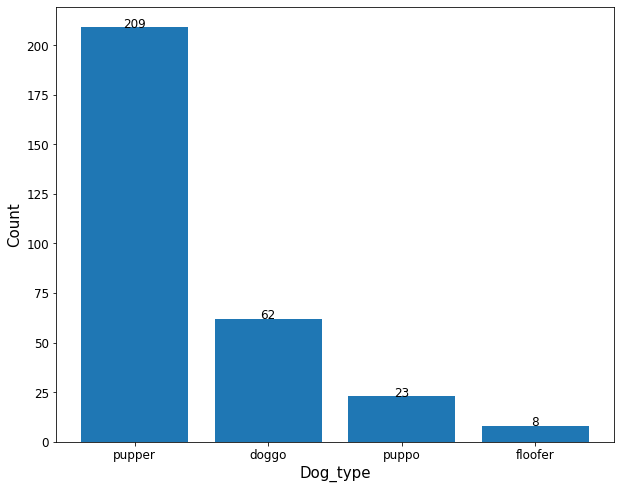

In [60]:
plt.figure(figsize=(10,8))
plt.bar(df_master.dog_type.value_counts().index,df_master.dog_type.value_counts())
plt.tick_params(labelsize=12)
plt.xlabel('Dog_type',fontsize=15)
plt.ylabel('Count',fontsize=15)
for i,j in enumerate(df_master.dog_type.value_counts()):
    plt.text(i,j,str(j),horizontalalignment='center',fontsize=12)

#### Plotting the Source- Count bar graph

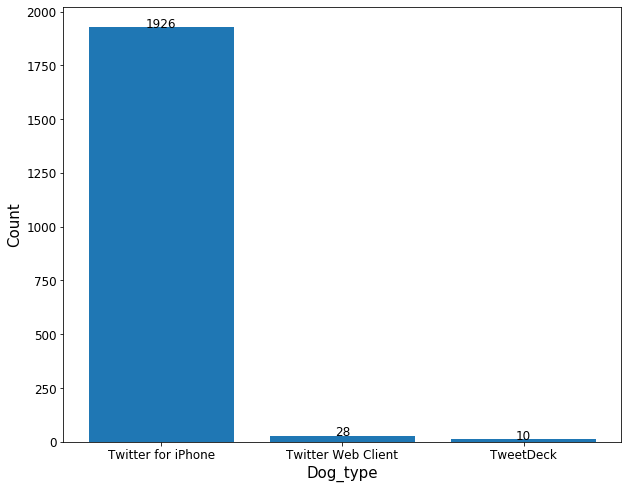

In [58]:
plt.figure(figsize=(10,8))
plt.bar(df_master.cleaned_source.value_counts().index,df_master.cleaned_source.value_counts())
plt.tick_params(labelsize=12)
plt.xlabel('Source',fontsize=15)
plt.ylabel('Count',fontsize=15)
for i,j in enumerate(df_master.cleaned_source.value_counts()):
    plt.text(i,j,str(j),horizontalalignment='center',fontsize=12)

#### Plotting the rating-count graph

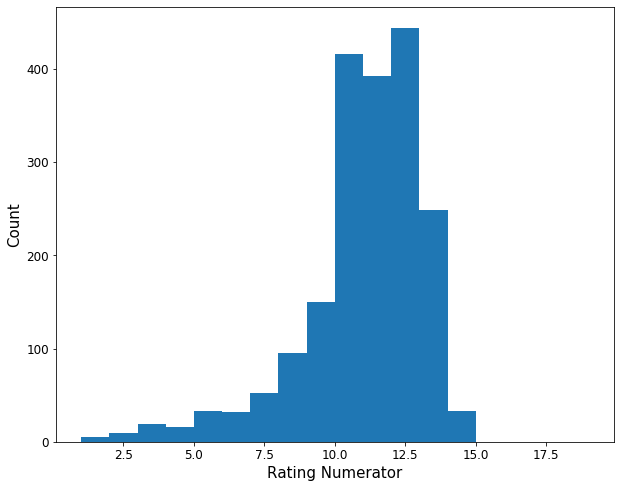

In [95]:
fig, ax = plt.subplots(figsize = (10, 8) )
ax.hist(df_master['rating_numerator'], bins = range(1,20))
ax.set_ylabel('Count', fontsize = 15)
ax.set_xlabel('Rating Numerator', fontsize = 15)
ax.tick_params(labelsize=12)

#### Finding the top tweeted dog

In [7]:
# finding the top dogs with count>10
pop_dog=df_master.breed.value_counts()
pop_dog=pop_dog[pop_dog>10]

In [8]:
pop_dog

Unknown                           305
golden_retriever                  156
Labrador_retriever                104
Pembroke                           94
Chihuahua                          90
pug                                62
toy_poodle                         49
chow                               48
Pomeranian                         41
Samoyed                            41
malamute                           33
Chesapeake_Bay_retriever           31
cocker_spaniel                     30
French_bulldog                     30
miniature_pinscher                 24
Eskimo_dog                         22
Cardigan                           21
German_shepherd                    21
beagle                             20
Shih-Tzu                           20
Siberian_husky                     20
Staffordshire_bullterrier          19
Maltese_dog                        19
Shetland_sheepdog                  18
Rottweiler                         18
Italian_greyhound                  17
Lakeland_ter

In [9]:
popular_dog_breeds=pop_dog[1:] #using slicing to remove the "Unknowns" breeds

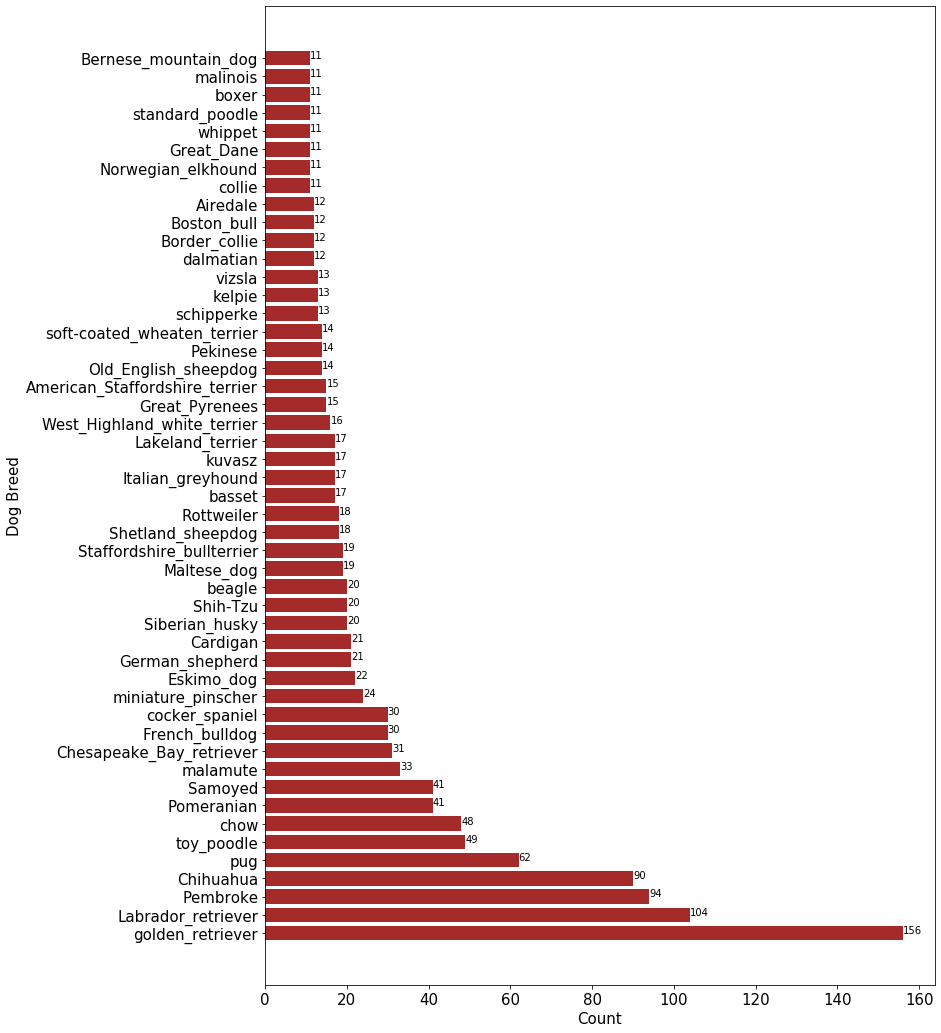

In [128]:
fig,ax=plt.subplots(figsize=(12,18))
ax.barh(popular_dog_breeds.index,popular_dog_breeds,color='brown')
ax.set_xlabel('Count',fontsize=15)
ax.set_ylabel('Dog Breed',fontsize=15)
ax.tick_params(labelsize=15)
for i,j in enumerate(popular_dog_breeds):
    ax.text(j,i,str(j))

> As we can see golden_retriever is the top tweeted dog followed by Labrador_retriever and Pembroke

#### Finding the toprated dog breed

In [158]:
df_master.describe()

,retweet_count,favorite_count,rating_numerator,rating_denominator,confidence,img_num
count,1964.000000,1964.000000,1964.000000,1964.000000,1964.000000,1964.000000
mean,2464.577393,8293.784623,12.223014,10.479124,0.465133,1.202138
std,4401.859858,12190.786050,41.708155,6.865424,0.339506,0.559615
min,11.000000,70.000000,0.000000,2.000000,0.000000,1.000000
25%,549.500000,1782.250000,10.000000,10.000000,0.140339,1.000000
50%,1191.500000,3752.500000,11.000000,10.000000,0.459560,1.000000
75%,2814.750000,10349.000000,12.000000,10.000000,0.776453,1.000000
max,77553.000000,155607.000000,1776.000000,170.000000,0.999956,4.000000


#### making new dataframe for rating_numerator<14 as we can see from the above description, 1776 is the outlier

In [10]:
df_master.rating_numerator.value_counts()

12      444
10      416
11      392
13      249
9       150
8        95
7        52
5        33
14       33
6        32
3        19
4        16
2         9
1         5
1776      1
24        1
26        1
420       1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
144       1
165       1
204       1
0         1
Name: rating_numerator, dtype: int64

> As we can see most of the data lies in ratings <15, creating the dataframe in accordance to it

In [11]:
newdf=df_master.loc[df_master.rating_numerator<15]

In [12]:
newdf.rating_numerator.value_counts()

12    444
10    416
11    392
13    249
9     150
8      95
7      52
14     33
5      33
6      32
3      19
4      16
2       9
1       5
0       1
Name: rating_numerator, dtype: int64

In [13]:
#grouping the dataframe with breeds
newdf1=newdf.groupby('breed')['rating_numerator'].describe()

In [14]:
newdf1

,count,mean,std,min,25%,50%,75%,max
breed,,,,,,,,
Afghan_hound,3.0,9.666667,5.773503,3.0,8.00,13.0,13.00,13.0
Airedale,12.0,9.833333,2.249579,6.0,9.25,10.5,11.25,12.0
American_Staffordshire_terrier,15.0,10.133333,3.090693,0.0,10.00,11.0,11.50,13.0
Appenzeller,2.0,11.000000,2.828427,9.0,10.00,11.0,12.00,13.0
Australian_terrier,2.0,11.500000,2.121320,10.0,10.75,11.5,12.25,13.0
Bedlington_terrier,6.0,10.333333,3.141125,6.0,8.25,10.5,12.75,14.0
Bernese_mountain_dog,11.0,11.272727,1.103713,10.0,10.00,12.0,12.00,13.0
Blenheim_spaniel,10.0,11.100000,1.100505,9.0,10.25,11.5,12.00,12.0
Border_collie,12.0,10.583333,2.503028,4.0,9.75,11.5,12.00,13.0


> From this description we can check that there are some breed who are rated by 1 or 2 people, this might be misleading data. now we have to take those breeds who's rate counts are more then 10.



In [15]:
newdf1=newdf1[newdf1['count']>9]

In [16]:
newdf1

,count,mean,std,min,25%,50%,75%,max
breed,,,,,,,,
Airedale,12.0,9.833333,2.249579,6.0,9.25,10.5,11.25,12.0
American_Staffordshire_terrier,15.0,10.133333,3.090693,0.0,10.00,11.0,11.50,13.0
Bernese_mountain_dog,11.0,11.272727,1.103713,10.0,10.00,12.0,12.00,13.0
Blenheim_spaniel,10.0,11.100000,1.100505,9.0,10.25,11.5,12.00,12.0
Border_collie,12.0,10.583333,2.503028,4.0,9.75,11.5,12.00,13.0
Boston_bull,12.0,9.416667,2.108784,5.0,8.75,10.0,11.00,12.0
Cardigan,21.0,11.142857,1.590148,7.0,10.00,11.0,12.00,13.0
Chesapeake_Bay_retriever,31.0,10.838710,1.439833,8.0,10.00,10.0,12.00,13.0
Chihuahua,90.0,10.500000,2.089299,3.0,10.00,11.0,12.00,14.0


In [204]:
newdf1.sort_values('mean',ascending=False)[:10]

,count,mean,std,min,25%,50%,75%,max
breed,,,,,,,,
Samoyed,41.0,11.731707,1.342095,7.0,11.00,12.0,13.0,14.0
golden_retriever,154.0,11.538961,1.324150,5.0,11.00,12.0,12.0,14.0
Great_Pyrenees,14.0,11.428571,1.222500,9.0,11.00,11.5,12.0,13.0
Pembroke,94.0,11.425532,1.719523,4.0,11.00,12.0,12.0,14.0
Eskimo_dog,22.0,11.409091,1.402688,9.0,10.00,12.0,12.0,14.0
chow,47.0,11.404255,1.361897,7.0,11.00,12.0,12.0,13.0
cocker_spaniel,30.0,11.333333,1.184187,9.0,10.25,11.5,12.0,13.0
Siberian_husky,19.0,11.315789,1.157230,9.0,10.50,11.0,12.0,13.0
kelpie,13.0,11.307692,1.109400,10.0,11.00,11.0,12.0,13.0


In [17]:
newdf1=newdf1.sort_values('mean',ascending=False)[:10]

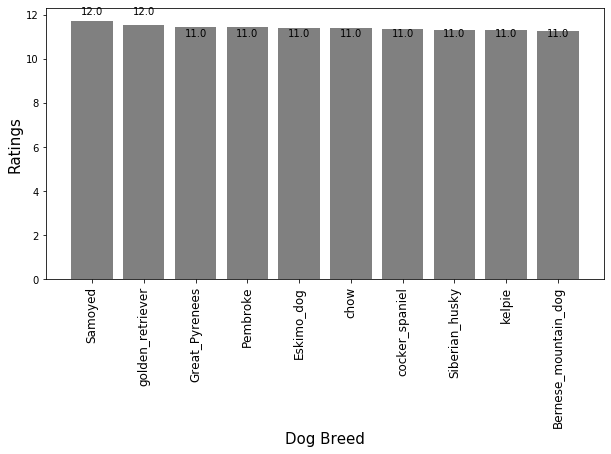

In [20]:
fig,ax=plt.subplots(figsize=(10,5))
ax.bar(newdf1.index,newdf1['mean'],color='grey')
ax.tick_params(axis='x',labelsize=12,labelrotation=90)
ax.set_xlabel('Dog Breed',fontsize=15)
ax.set_ylabel('Ratings',fontsize=15)
for i,j in enumerate(round(newdf1['mean'])):
    ax.text(i,j,str(j),horizontalalignment='center',fontsize=10)

> **Observation**: Here we can see that the top rated breed is Samoyed followed by golden_retriever and Great_Pyrenees.


#### Finding the Most liked breed

In [276]:
dummydf=df_master.groupby('breed').describe()
newdf2=dummydf['favorite_count']

In [277]:
newdf2=newdf2[newdf2['count']>9].sort_values('mean',ascending=False)[:30]

In [278]:
newdf2

,count,mean,std,min,25%,50%,75%,max
breed,,,,,,,,
French_bulldog,30.0,18704.100000,23913.577171,304.0,3173.25,9591.0,25008.00,116074.0
whippet,11.0,13463.090909,21550.810882,543.0,2245.50,5760.0,13727.50,74591.0
English_springer,10.0,12940.700000,30574.708426,423.0,748.50,1796.0,5352.00,98917.0
standard_poodle,11.0,12747.636364,25573.509522,252.0,2062.50,3517.0,7998.50,87815.0
cocker_spaniel,30.0,12583.566667,16392.653207,266.0,2918.75,8534.5,14617.25,75943.0
Samoyed,41.0,12550.682927,13425.636068,732.0,2573.00,6744.0,19056.00,49790.0
Eskimo_dog,22.0,11835.136364,24086.926103,496.0,1680.50,2976.0,13964.00,114982.0
Cardigan,21.0,11685.476190,10357.236285,481.0,4077.00,7818.0,16889.00,34466.0
Lakeland_terrier,17.0,11543.470588,31502.546256,244.0,1460.00,2810.0,5191.00,132591.0


Text(0, 0.5, 'Favorite Count')

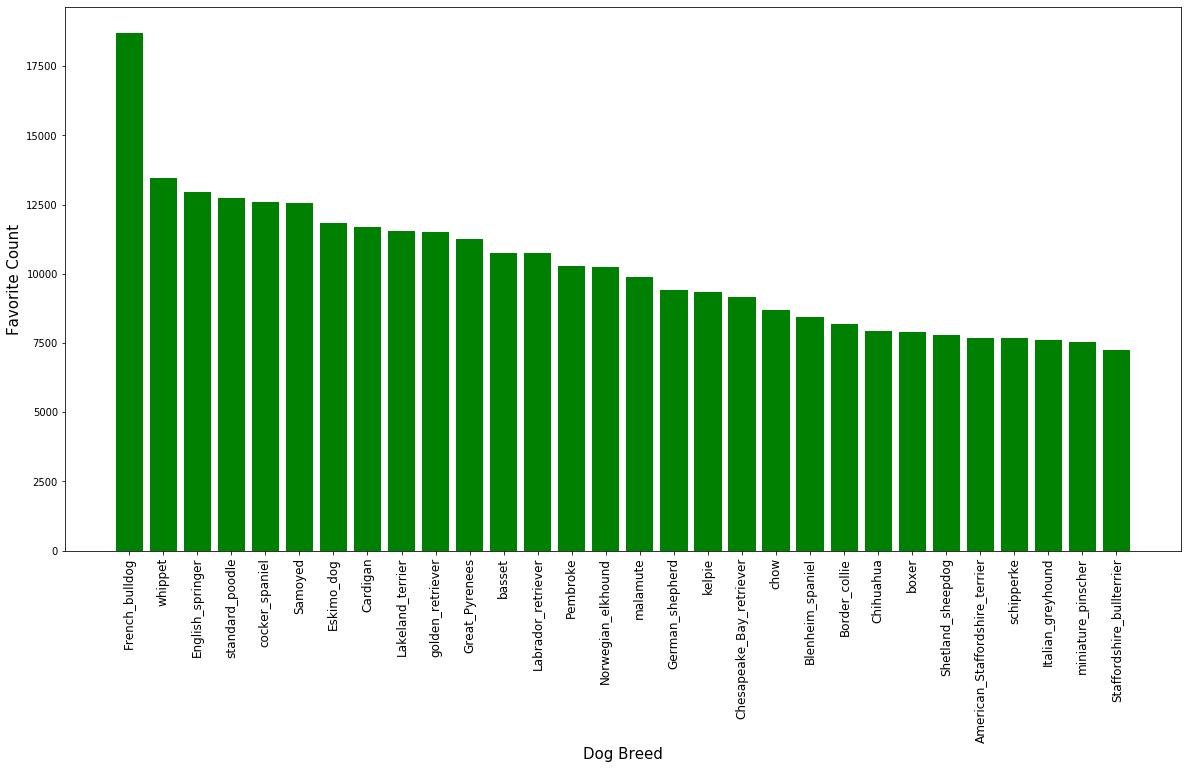

In [299]:
fig,ax=plt.subplots(figsize=(20,10))
ax.bar(newdf2.index,newdf2['mean'],color='Green')
ax.tick_params(axis='x',labelsize=12,labelrotation=90)
ax.set_xlabel('Dog Breed',fontsize=15)
ax.set_ylabel('Favorite Count',fontsize=15)

> **Observation**: Here we can see that the top liked breed is French_bulldog followed by whipped and English_springer.
